***DIABETES PREDICTION ON PIMA INDIAN DATASET***


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

**Reading the dataset**

In [ ]:
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Exploring our Data** 

In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Information about the dataset**


In [ ]:
diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Describing the dataset**

In [ ]:
diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Checking the number of null values our dataset has**

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Data visualization**

**Plotting the data distribution plots before removing null values**

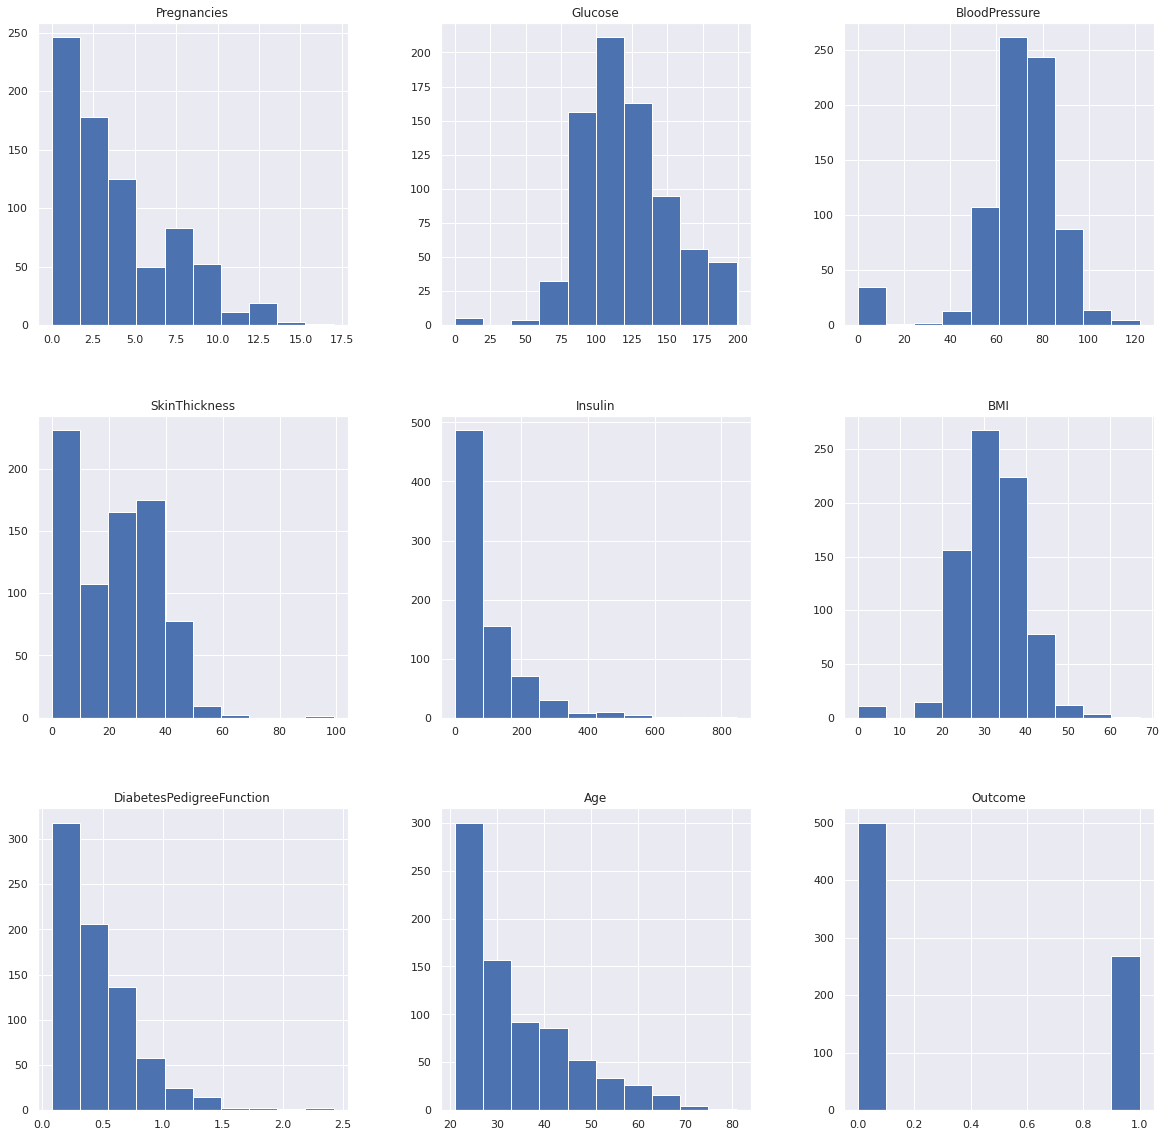

In [ ]:
p = diabetes_df.hist(figsize = (20,20))

**Imputing the mean value of the column to each missing value of that particular column**

In [ ]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

**Plotting after removing Nan values**

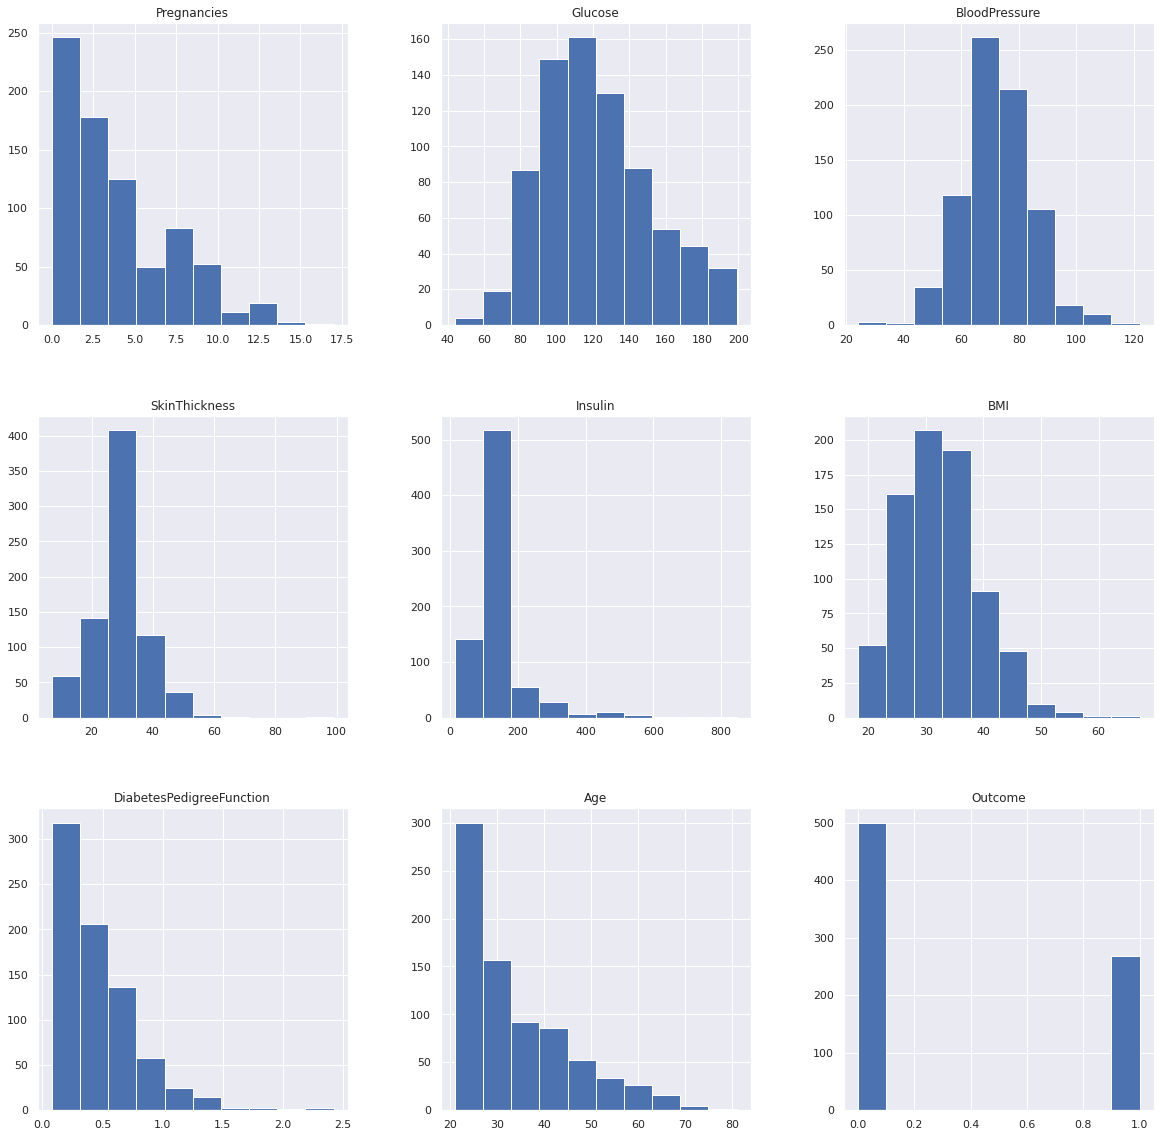

In [ ]:
p = diabetes_df_copy.hist(figsize = (20,20))


**Correlation between all the features**

Correlation between all the features 

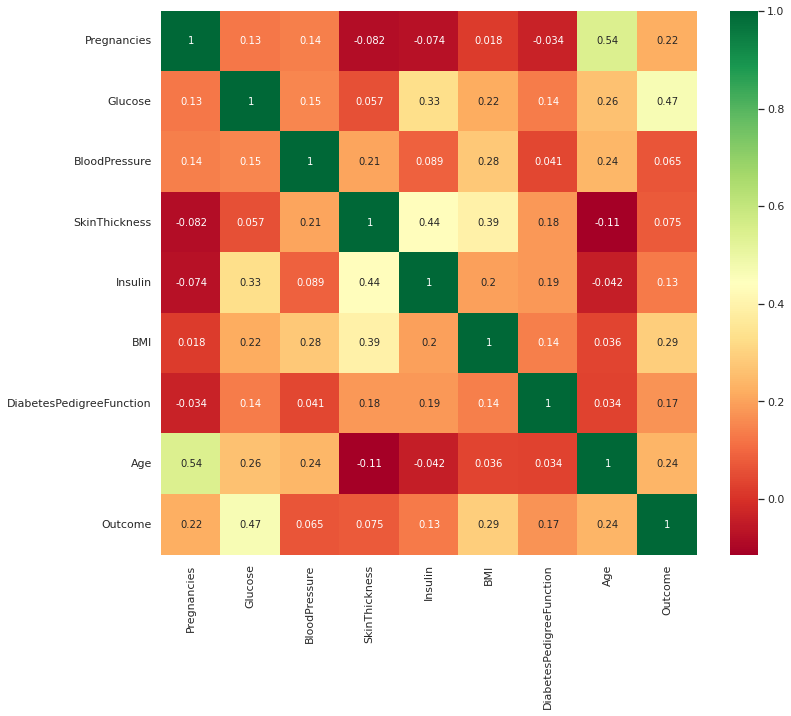

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

**Standardizing the Data**

Before scaling down the data-

In [ ]:
diabetes_df_copy.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**Standard Scalar**

In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**Model Building**

***Splitting the dataset training and testing data using the train_test_split function ***

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

**Algorithm 1 : Logistics Regression**

**Building the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

**Predicting on test data**

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1]


**Performance Measures**





> Accuracy Score




In [ ]:
from sklearn import metrics
lg =(metrics.accuracy_score(y_test, y_pred))
print("Accuracy_Score =",lg)

Accuracy_Score = 0.7874015748031497




> Confusion Matrix


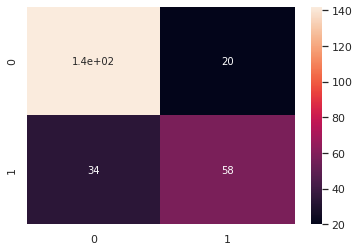

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)



>Precision



In [ ]:
from sklearn.metrics import precision_score
lgp=(precision_score(y_test, y_pred))
print("Precision score:",lgp)


Precision score: 0.7435897435897436




> Recall



In [ ]:
from sklearn.metrics import recall_score
lgr=(recall_score(y_test, y_pred))
print("Recall score:",lgr)

Recall score: 0.6304347826086957


F1 score

In [ ]:
from sklearn.metrics import f1_score
print("f1 score:",f1_score(y_test, y_pred))

f1 score: 0.6823529411764706




> Classification Report



In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:",classification_report(y_test, y_pred))


Classification Report:               precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



**Algorithm 2 : Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)



> Predicting the test data



In [ ]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print(predictions)


[0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1]


**Accuracy on test data**

In [ ]:
from sklearn import metrics
rf =(metrics.accuracy_score(y_test, predictions))
print("Accuracy_Score =",rf)

Accuracy_Score = 0.7716535433070866




> Confusion Matrix



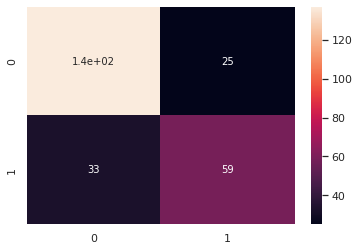

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)



> Precision 



In [ ]:
from sklearn.metrics import precision_score
rfp=(precision_score(y_test, predictions))
print("Precision score:",rfp)

Precision score: 0.7023809523809523




> Recall

> 




In [ ]:
from sklearn.metrics import recall_score
rfr=(recall_score(y_test, predictions))
print("Recall score:",rfr)

Recall score: 0.6413043478260869




> F1 score



In [ ]:
from sklearn.metrics import f1_score
print("f1 score:",f1_score(y_test, predictions))

f1 score: 0.6704545454545454




>Classification Report



In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:",classification_report(y_test,predictions))



Classification Report:               precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.70      0.64      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.77      0.77      0.77       254



**Algorithm 3 : Decision Tree**

**Building the model using DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Predicting on Testing Data

In [ ]:
dtree_pred = dtree.predict(X_test)
print(dtree_pred)

[0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1]




> Accuracy



In [ ]:
from sklearn import metrics
dt =(metrics.accuracy_score(y_test, dtree_pred))
print("Accuracy_Score =",dt)

Accuracy_Score = 0.7401574803149606




> Confusion Matrix



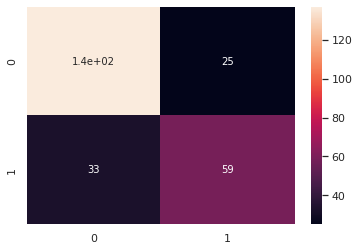

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

Precision

In [ ]:
from sklearn.metrics import precision_score
dp=(precision_score(y_test, predictions))
print("Precision score:",dp)

Precision score: 0.7023809523809523


Recall

In [ ]:
from sklearn.metrics import recall_score
dr=(recall_score(y_test, predictions))
print("Recall score:",dr)

Recall score: 0.6413043478260869


F1 score

In [ ]:
from sklearn.metrics import f1_score
print("f1 score:",f1_score(y_test, predictions))

f1 score: 0.6704545454545454






> Classification Report





In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.70      0.64      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.77      0.77      0.77       254



**Visualisation of Decision Tree**

[Text(0.5, 0.875, 'X[1] <= 127.5\ngini = 0.45\nsamples = 514\nvalue = [338, 176]'),
 Text(0.25, 0.625, 'X[7] <= 28.5\ngini = 0.308\nsamples = 332\nvalue = [269, 63]'),
 Text(0.125, 0.375, 'X[5] <= 30.95\ngini = 0.152\nsamples = 193\nvalue = [177, 16]'),
 Text(0.0625, 0.125, 'gini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.1875, 0.125, 'gini = 0.273\nsamples = 86\nvalue = [72, 14]'),
 Text(0.375, 0.375, 'X[5] <= 26.35\ngini = 0.448\nsamples = 139\nvalue = [92, 47]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.4375, 0.125, 'gini = 0.486\nsamples = 113\nvalue = [66, 47]'),
 Text(0.75, 0.625, 'X[5] <= 28.15\ngini = 0.471\nsamples = 182\nvalue = [69, 113]'),
 Text(0.625, 0.375, 'X[1] <= 145.5\ngini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(0.5625, 0.125, 'gini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.6875, 0.125, 'gini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.875, 0.375, 'X[1] <= 165.5\ngini = 0.415\nsamples = 150\nvalue = [44, 1

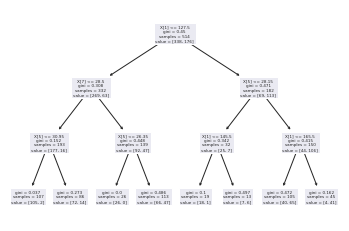

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dtree)

diabetes.csv  diabetes_df.dot  drive/  sample_data/


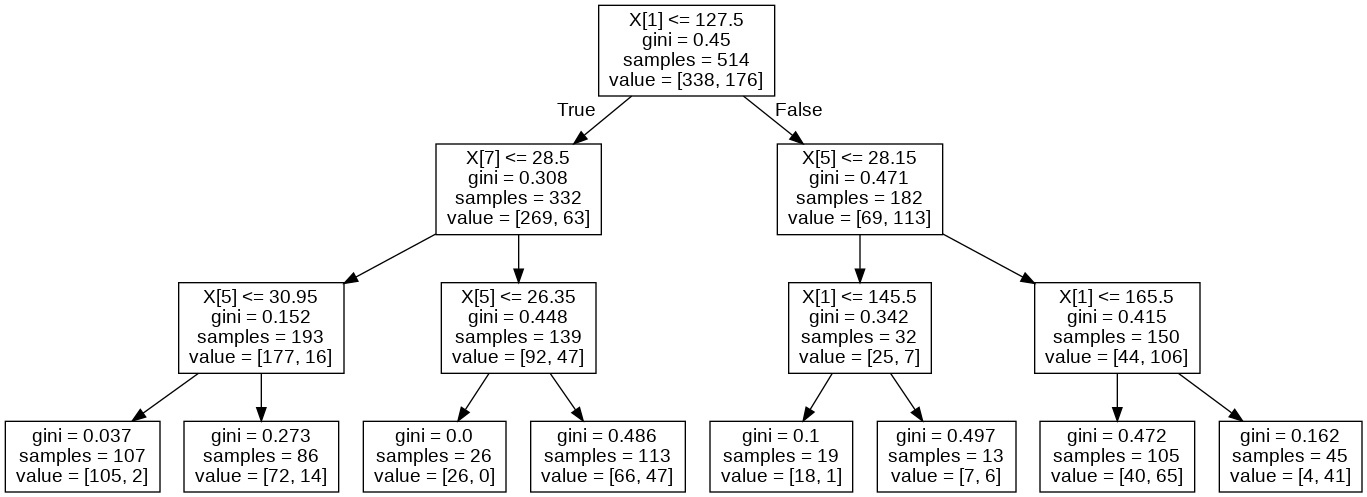

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtree,
    out_file = 'diabetes_df.dot'
)
%ls
! dot -Tpng diabetes_df.dot -o d_tree.png

from IPython.display import Image
Image (filename = 'd_tree.png')


**Algorithm 4 : Support Vector Machine (SVM)**

**Building the model using Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

**Prediction from support vector machine model on the testing data**

In [ ]:
svc_pred = svc_model.predict(X_test)
print(svc_pred)


[0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1]




> Accuracy score 






In [ ]:
from sklearn import metrics
s =(metrics.accuracy_score(y_test, svc_pred))
print("Accuracy_Score =",s)

Accuracy_Score = 0.7480314960629921


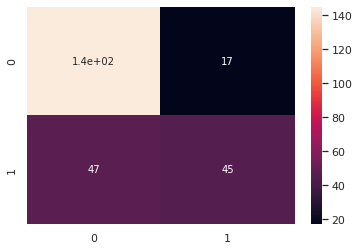

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot = True)



> Precision



In [ ]:
from sklearn.metrics import precision_score
sp=(precision_score(y_test, svc_pred))
print("Precision score:",sp)

Precision score: 0.7258064516129032




> Recall



In [ ]:
from sklearn.metrics import recall_score
sr=(recall_score(y_test, svc_pred))
print("Recall score:",sr)

Recall score: 0.4891304347826087




> F1 score



In [ ]:
from sklearn.metrics import f1_score
print("f1 score:",f1_score(y_test, svc_pred))

f1 score: 0.5844155844155844




> Classification Report


In [ ]:
from sklearn.metrics import classification_report
print("classification report:",classification_report(y_test, svc_pred))



classification report:               precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



In [ ]:
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.

4th Patient

In [ ]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
classifier.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
dtree.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
svc_model.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])

**Soft voting**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
estimator = [svc_model, dtree, rfc, classifier]
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')

In [ ]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

TypeError: ignored

**Final Visualizations** 

**Accuracy comparision**

In [ ]:
d1 = {'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine'],
     'accuracy' : [lg, rf, dt,s]}

results1 = pd.DataFrame(data = d1)
results1     

,Model,accuracy
0,Logistic Regression,0.787402
1,Random Forest,0.771654
2,Decision Tree,0.740157
3,Support Vector Machine,0.748031


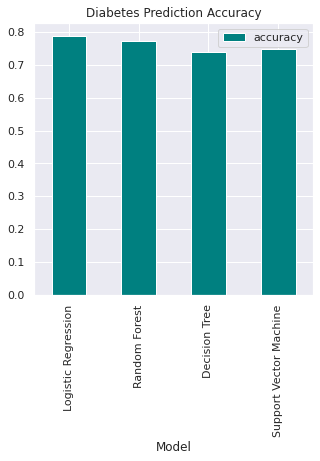

In [ ]:
results1.plot(x='Model', y='accuracy', kind='bar', figsize=(5, 5), title='Diabetes Prediction Accuracy', 
               sort_columns=True, color="teal")

**Precision comparison**

In [ ]:
d2 = {'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine'],
     'precision' : [lgp, rfp, dp,sp]}

results2 = pd.DataFrame(data = d2)
results2    


,Model,precision
0,Logistic Regression,0.743590
1,Random Forest,0.702381
2,Decision Tree,0.702381
3,Support Vector Machine,0.725806


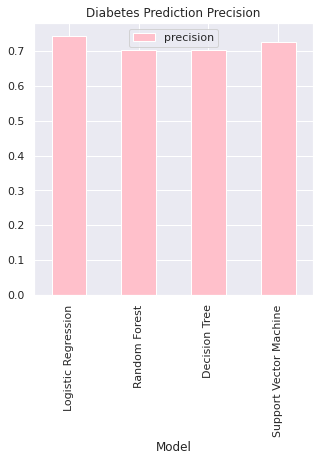

In [ ]:
results2.plot(x='Model', y='precision', kind='bar', figsize=(5, 5), title='Diabetes Prediction Precision', 
               sort_columns=True, color="pink")

**Recall Comparison**

In [ ]:
d3 = {'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine'],
     'recall' : [lgr, rfr, dr,sr]}

results2 = pd.DataFrame(data = d3)
results2 

,Model,recall
0,Logistic Regression,0.630435
1,Random Forest,0.641304
2,Decision Tree,0.641304
3,Support Vector Machine,0.489130


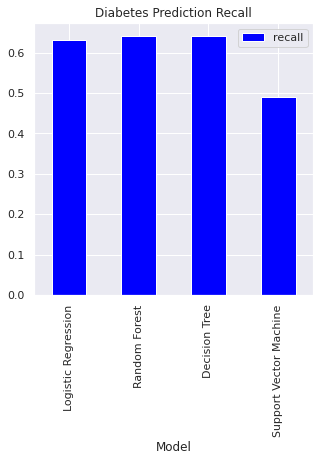

In [ ]:
results2.plot(x='Model', y='recall', kind='bar', figsize=(5, 5), title='Diabetes Prediction Recall', 
               sort_columns=True, color="blue")

After using all these patient records, we realise accuracy is not the only measure to check if a model is suitable or not
With respect to diabetes, high recall is considered more important than hig precision. Logistic Regression having the highest recall is considered most suitable

In [ ]:
accuracy = 85%

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')